# **PRE-REQUISITE**

Mount Google Drive untuk Akses Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Menggunakan Library NLTK untuk Natural Language Processing (NLP)

In [2]:
!pip install NLTK

# **1. Exploratory Data Analysis**


**1.1 Load Dataset yang Sudah di Download dan di Masukkan ke Dalam Drive**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Download Dataset Disini
# https://drive.google.com/file/d/1V_2rm8BK1Uiz_KU067U4dopXZ0REaDcw/view?usp=drive_link
path = '/content/drive/MyDrive/Colab Notebooks/project_based_learning/spam_classification/dataset.csv'
df = pd.read_csv(path, encoding='latin-1')
print(df.head)

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

**1.2 Hapus Kolom Kosong dan Rename Kolom**

In [25]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df = df.rename(columns={'v1':'label', 'v2':'text'})
print(df.columns)
print(df.head)

Index(['label', 'text'], dtype='object')
<bound method NDFrame.head of      label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>


**1.3 Hitung Berapa Banyak Pesan ham vs spam**

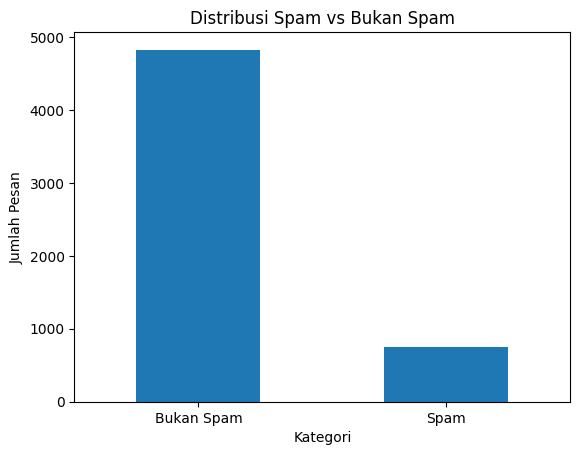

In [26]:
# Distribusi Pesan Ham vs Spam
df['label'].value_counts().plot(kind='bar') # Memakai method count di 'label'
ax = df['label'].value_counts().plot(kind='bar')
ax.set_title('Distribusi Spam vs Bukan Spam') # Ganti Title Utama
ax.set_ylabel('Jumlah Pesan') # Ganti Label Sumbu Y
ax.set_xlabel('Kategori') # Ganti Label Sumbu X
ax.set_xticklabels(['Bukan Spam', 'Spam'], rotation=0) # Ganti Title Sumbu X, rotation=0 untuk horizontal
plt.show()

**1.4 Analisis Panjang Teks ham vs spam**

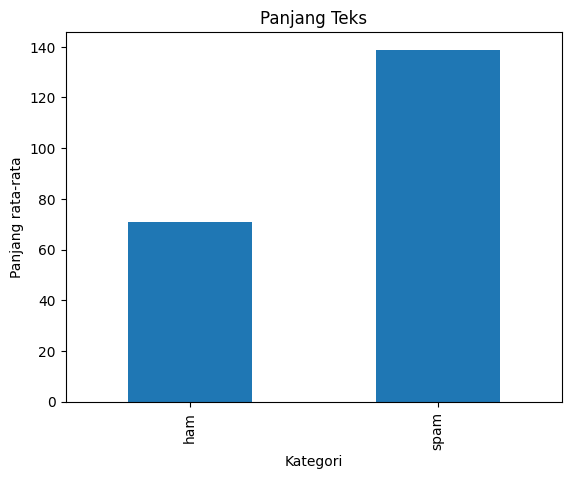

In [27]:
# Analisis Panjang Teks
df['length'] = df['text'].apply(len)
df.groupby('label')['length'].mean().plot(kind='bar')
ax = df.groupby('label')['length'].mean().plot(kind='bar')
ax.set_title('Panjang Teks')
ax.set_ylabel('Panjang rata-rata')
ax.set_xlabel('Kategori')
plt.show()

# **2. Text Preprocessing**

**2.1 Inisialisasi dan Downlaod Resource NLTK**

In [28]:
# Inisialisasi Preprocessing Text
import nltk

# Download Resource NLTK (Run sekali saja)
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**2.2 Preprocessing Teks :**


1.   **Case Folding** -> *Ubah ke Lowercase*
2.   **Hapus Tanda Baca & Angka**
3.   **Tokenisasi** -> *Potong Teks Menjadi Kata-Kata*
4.   **Stopword Removal** -> *Buang Kata Umum Tidak Penting*
5.   **Lemmatisasi** -> *Reduksi Kata Jadi Bentuk Dasar*



In [29]:
# Preprocessing Text
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Inisialisasi Tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Workflow Pre-Processing Text
def preprocess_text(text): # ---> Buat fungsi
  # 1. Case Folding -> Ubah ke lowercase
  text = text.lower()

  # 2. Hapus tanda baca dan angka
  text = ''.join([char for char in text if char not in
                  string.punctuation and not char.isdigit()])
  # 3. Tokenisasi -> Potong teks jadi kata-kata
  tokens = word_tokenize(text)

  # 4. Stopword Removal -> Buang kata umum tak penting
  tokens = [word for word in tokens if word not in stop_words]

  # 5. Lemmatisasi -> Reduksi kata ke bentuk dasar
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  return ' '.join(tokens) # Gabung kembali menjadi string

# Apply ke dalam kolom 'text' (Dalam DataFrame)
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Cek Hasil
print("Original Text :", df['text'].iloc[0])
print("Cleaned Text :", df['cleaned_text'].iloc[0])
print(df[['text', 'cleaned_text']].head(3))

Original Text : Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Cleaned Text : go jurong point crazy available bugis n great world la e buffet cine got amore wat
                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   

                                        cleaned_text  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  


**2.3 Feature Engineering : Membuat Representasi Numerik dari Teks Menggunakan TF-IDF**

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF
tfidf = TfidfVectorizer(max_features=5000) # Membatasi 5000 kata paling penting

# Transform teks menjadi vektor numerik
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

# Cek Hasil
print("Shape :", X_tfidf.shape) # (jumlah_sms, jumlah_fitur)
print("Contoh Fitur :", tfidf.get_feature_names_out()[:10]) # 10 Kata Pertama

Shape : (5572, 5000)
Contoh Fitur : ['aah' 'aathilove' 'aathiwhere' 'abi' 'ability' 'abiola' 'abj' 'able'
 'abnormally' 'aboutas']


# **3. Pembuatan Model**

**3.1 Persiapan Data**

***3.1.1 Encoding Label ham & spam***


In [31]:
from sklearn.model_selection import train_test_split

# 1. Encode Label --> Ubah ham = 0, spam = 1
df['label_encoded'] = df['label'].map({'ham': 0, 'spam': 1})
y = df['label_encoded']

***3.1.2 Split Data***

In [32]:
# 2. Split data (X_tfidf dari TF-IDF sebelumnya)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (4457, 5000)
Testing size: (1115, 5000)


**3.2 Train & Evaluasi Model (Naive Bayes, Logistic Regression, SVM)**

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inisialisasi Model
models = {"Naive Bayes:": MultinomialNB(),
          "Logistic Regression:": LogisticRegression(max_iter=1000),
          "SVM:": SVC(kernel='linear')}

# Kamus untuk simpan hasil
results = {}

# Training & Evaluasi
for name, model in models.items():
  # Training
  model.fit(X_train, y_train)

  # Prediksi
  y_pred = model.predict(X_test)

  # Evaluasi
  accuracy = accuracy_score(y_test, y_pred)
  results[name] = accuracy

  print(f"{name} Accuracy: {accuracy:.4f}")

Naive Bayes: Accuracy: 0.9704
Logistic Regression: Accuracy: 0.9498
SVM: Accuracy: 0.9767


 ***3.2.1 Evaluasi SVM Dengan Confusion Matrix (Laporan Hasil Klasifikasi)***

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

# Prediksi dengan SVM (Model dengan akurasi tertinggi)
y_pred = models["SVM:"].predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[962   3]
 [ 23 127]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



***3.2.2 Optimisasi Recall Spam (Menurunkan Threshold)***

In [37]:
# Evaluasi Recall spamm

# Mendapatkan probabilitas prediksi (bukan kelas 0/1)
y_prob = models["SVM:"].decision_function(X_test) # Gunakan method decision_function untuk SVM

# Menurunkan threshold menjadi -0.5 (default = 0)
threshold = -0.5
y_pred_new = (y_prob > threshold).astype(int)

# Evaluasi lagi
print(classification_report(y_test, y_pred_new, target_names=['ham', 'spam']))

# Cek Hasil
print(df['cleaned_text'].head(10))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       965
        spam       0.89      0.92      0.90       150

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st ...
3                  u dun say early hor u c already say
4             nah dont think go usf life around though
5    freemsg hey darling week word back id like fun...
6        even brother like speak treat like aid patent
7    per request melle melle oru minnaminunginte nu...
8    winner valued network customer selected receiv...
9    mobile month u r entitled update latest colour...
Name: cleaned_text, dtype: object


# **📌 Glossary Sederhana**

**1. Case Folding → "Standarisasi Ukuran"**

**Analogi:** Seperti mengubah semua tulisan di resep makanan ke huruf kecil agar konsisten.

Contoh Kode:
```
text = "Ini PESAN Penting!"
text_lower = text.lower()  # Output: "ini pesan penting"
```



**2. Tokenisasi → "Memotong Sayuran"**

**Analogi:** Memisahkan kalimat menjadi kata-kata individu seperti memotong wortel untuk sup.

Contoh Kode:
```
from nltk.tokenize import word_tokenize
text = "Diskon 50%! Klaim sekarang!"
tokens = word_tokenize(text)  
# Output: ['Diskon', '50%', '!', 'Klaim', 'sekarang', '!']
```


**3. Stop Words Removal → "Membuang Kulit Bawang"**

**Analogi:** Menghilangkan kata tidak penting (contoh: "dan", "di", "yang") seperti membuang kulit bawang yang tidak dimakan.

Contoh Kode:
```
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))  # Stop words bahasa Indonesia
filtered_tokens = [word for word in tokens if word not in stop_words]
```


**4. Stemming/Lemmatisasi → "Mengurangi Kata ke Bentuk Dasar"**
**Analogi:** Seperti mengubah "lari", "lari-lari", "pelari" → "lari".

Contoh Kode (Stemming):
```
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_word = stemmer.stem("running")  # Output: "run"
```


**5. Bag-of-Words (BoW) → "Menghitung Bahan Masakan"**

**Analogi:** Membuat daftar semua bahan di resep dan menghitung jumlahnya (tidak peduli urutan).

Contoh Kode:
```
from sklearn.feature_extraction.text import CountVectorizer
corpus = ["Diskon besar-besaran", "Penting: meeting jam 3"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)  # Output: matrix jumlah kata
```


**6. TF-IDF → "Menilai Pentingnya Bahan"**

**Analogi:** Kata yang sering muncul di semua dokumen (contoh: "dan") kurang penting daripada kata unik seperti "diskon".

Contoh Kode:
```
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(corpus)  # Output: matrix bobot kata
```


**7. Naive Bayes/SVM/Logistic Regression → "Alat Klasifikasi"**

**Analogi:**
- *Naive Bayes*: Seperti dokter yang menebak penyakit berdasarkan gejala (cepat tapi sederhana).

- *SVM*: Seperti menggambar garis pemisah tegas antara 2 kelompok.

- *Logistic Regression*: Memprediksi probabilitas (0-1) seperti kemungkinan hujan.



**8. Confusion Matrix → "Laporan Hasil Klasifikasi"**

**Analogi:** Tabel evaluasi prediksi spam vs nyatanya:


[ Prediksi Benar Spam | Prediksi Spam tapi Salah ]

[ Prediksi Salah Spam | Prediksi Benar Bukan Spam ]
